In [38]:
import numpy as np
from matplotlib import pyplot as plt

In [39]:
x0 = 20
y0 = 20
alpha1 = 1
beta1 = 0.1
alpha2 = 0.5
beta2 = 0.02
t0 = 0
tmax = 50
n = 1000
h = (tmax - t0) / n

def dx(x, y):
    return x * (alpha1 - beta1 * y)

def dy(x, y):
    return y * (-alpha2 + beta2 * x)

In [40]:
def euler_explicit():
    nsteps = int((tmax - t0) / h)
    y = np.zeros(nsteps + 1)
    y[0] = y0
    t = np.zeros(nsteps + 1)
    t[0] = t0
    for k in range(nsteps):
        t[k + 1] = t0 + (k + 1) * h
        y[k + 1] = y[k] + h * y[k] * (-alpha2 + beta2 * t[k])
    return y, t

def euler_implicit():
    nsteps = int((tmax - t0) / h)
    y = np.zeros(nsteps + 1)
    y[0] = y0
    t = np.zeros(nsteps + 1)
    t[0] = t0
    for k in range(nsteps):
        t[k + 1] = t0 + (k + 1) * h
        y[k + 1] = y[k] / (1 + h * (alpha2 - beta2 * t[k]))
    return y, t

def euler_half_explicit():
    nsteps = int((tmax - t0) / h)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    y = np.zeros(nsteps + 1)
    y[0] = y0
    for k in range(nsteps):
        x[k + 1] = x[k] / (1 - h * (alpha1 - beta1 * y[k]))
        y[k + 1] = y[k] + h * y[k] * (-alpha2 + beta2 * x[k])
    return y, x

def runge_kutta_4():
    nsteps = int((tmax - t0) / h)
    y = np.zeros(nsteps + 1)
    y[0] = y0
    t = np.zeros(nsteps + 1)
    t[0] = t0

    def f(t, y):
        return dy(t, y)

    for k in range(nsteps):
        t[k + 1] = t0 + (k + 1) * h
        k1 = f(t[k], y[k])
        k2 = f(t[k] + h / 2, y[k] + h * k1 / 2)
        k3 = f(t[k] + h / 2, y[k] + h * k2 / 2)
        k4 = f(t[k] + h, y[k] + h * k3)
        y[k + 1] = y[k] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y, t

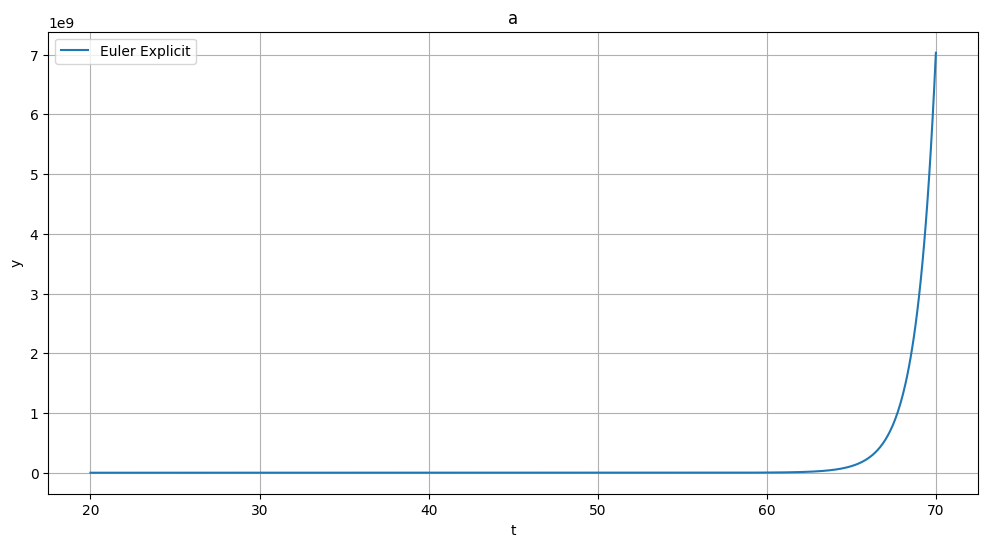

In [41]:
plt.figure(figsize=(12, 6))
plt.title("a")
labels = ["Euler Explicit"]#, "Euler Implicit", "Euler Half Explicit", "Runge-Kutta"]
functions = [euler_explicit] #, euler_implicit, euler_half_explicit, runge_kutta_4]
for f, label in zip(functions, labels):
    y_vec, x_vec = f()
    plt.plot(x_vec, y_vec, label=label)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()